# Australia's Lighthouses

## Introduction

### Overview

This notebook is a re-implementation of the chapter in the book *Python Maps*, relating to UK lighthouses.  Being a chauvanistic Australian, I used the Australian lighthouses to re-imagine some of the  maps from the book 

### Data source

The data is from _National Coastal Maritime Navigation Lights Database_, accessible at [https://ecat.ga.gov.au/geonetwork/srv/api/records/cffba00f-d106-0af4-e044-00144fdd4fa6].

The file is an ESRI Geodatabase (gdb) - the first `gdb` file I have had to deal with.

To get coastlines for Australia go to [https://www.abs.gov.au/statistics/standards/australian-statistical-geography-standard-asgs-edition-3/jul2021-jun2026/access-and-downloads/digital-boundary-files]

--------------------

## Implementation

### Notebook magic commands
`watermark` provides reproducability data, `lab_black` enforces a standard Python style

In [21]:
%load_ext watermark

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark


In [22]:
%load_ext lab_black

The lab_black extension is already loaded. To reload it, use:
  %reload_ext lab_black


### Notebook imports

In [23]:
import geopandas as gpd
import pandas as pd
import numpy as np

import xarray as xr

import matplotlib.pyplot as plt
from matplotlib import colors
import matplotlib

import cartopy.crs as ccrs

--------------------
## Data load

We load the database into a GeoDataFrame, and investigate the data structures

In [24]:
URL = "C:\\Data\\PythonMaps\\Lighthouses\\NationalCoastalMaritimeNavigationLights.gdb"

In [25]:
gdf = gpd.read_file(URL)

In [26]:
gdf.head()

,FEATURETYPE,NAME,REF_NUM,CODE,STATUS,STATE,HEIGHTABOVESL_M,TOWERHEIGHT_M,LIFESPAN,FEATURERELIABILITY,FEATURESOURCE,ATTRIBUTRRELIABILITY,ATTRIBUTESOURCE,PLANIMETRICACCURACY,SPATIALACCURACY,METADATACOMMENT,METADATALINK,REVISED,geometry
0,Coastal Navigation Light,Richmond River,2834.0,A,Operational,NEW SOUTH WALES,35.0,7.0,1866-,2009-01-01,Ballina_9640_50cm_2009.ecw,2012-11-22,Lighthouses of Australia Inc Website,8.0,5,None,None,2012-11-23,POINT (153.59191 -28.86704)
1,Coastal Navigation Light,Barranjoey,2702.0,A,Operational,NEW SOUTH WALES,113.0,20.0,1881-,2008-01-01,Sydney_9130_50cm_2008.ecw,2012-11-22,Lighthouses of Australia Inc Website,8.0,5,None,None,2012-11-23,POINT (151.32979 -33.58019)
2,Coastal Navigation Light,Blues Point,2688.0,L,Operational,NEW SOUTH WALES,18.0,14.0,1993-,2008-01-01,Sydney_9130_50cm_2008.ecw,2012-05-25,Australian Lighthouses Website,8.0,5,None,None,2012-11-23,POINT (151.20383 -33.85058)
3,Coastal Navigation Light,Bradleys Head,2662.0,W,Operational,NEW SOUTH WALES,7.0,7.0,1905-,2008-01-01,Sydney_9130_50cm_2008.ecw,2012-11-22,Lighthouses of Australia Inc Website,8.0,5,None,None,2012-11-23,POINT (151.24674 -33.85362)
4,Coastal Navigation Light,Burrewarra Point,2577.6,O,Operational,NEW SOUTH WALES,62.0,10.0,1974-,2010-04-01,BatemansBay_2010_04_10cm.ecw,2012-11-22,Lighthouses of Australia Inc Website,2.0,5,None,None,2012-11-23,POINT (150.23347 -35.83398)


Check what status a lighthouse can be in

In [27]:
gdf['STATUS'].unique()

array(['Operational', 'Ruin', 'Decommissioned', 'Removed', 'Historical',
       'Non Operational'], dtype=object)

Checking into the meta-data we get for `CODE`:
 
 * A Traditional lighthouse tower with internal stair and revolving lantern
 * B As above but with a fixed light such as a leading light
*  G Glass Reinforced Plastic Hut, usually solar panelled with quartz light (GRP Hut)
*  L Lattice metal tower, usually with a GRP hut on top
*  W In the water, i.e. a pile light or channel marker
*  Z Accommodation available – check with State Parks & Wildlife Office
*  O Other, usually white square masonry tower or some other oddity
*  S Lightship


Chcek the Coordinate Reference System used

In [28]:
gdf.crs

<Geographic 2D CRS: EPSG:4283>
Name: GDA94
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Australia including Lord Howe Island, Macquarie Island, Ashmore and Cartier Islands, Christmas Island, Cocos (Keeling) Islands, Norfolk Island. All onshore and offshore.
- bounds: (93.41, -60.55, 173.34, -8.47)
Datum: Geocentric Datum of Australia 1994
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

### Visualization

Do a quick and dirty visualization of the data

<Axes: >

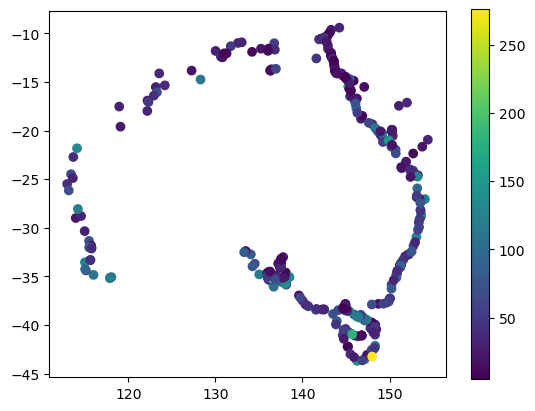

In [29]:
gdf[gdf['STATUS'] == 'Operational'].plot(
    column='HEIGHTABOVESL_M',
    legend=True,
)

### Coastlines

A map of lighthouses without a coastline is pretty poor.  We load in the Australia Bureau of Statistics (ABS) digital boundaries, and explore that data

The ABS is usually about Census boundaries, Local Government Boundaries, and the like, but their coastlines are excellent

In [30]:
oz_url = "C:\\Data\\PythonMaps\\Oz_Borders\\STE_2021_AUST_GDA2020.shp"

oz = gpd.read_file(oz_url)

oz.head()

,STE_CODE21,STE_NAME21,CHG_FLAG21,CHG_LBL21,AUS_CODE21,AUS_NAME21,AREASQKM21,LOCI_URI21,geometry
0,1,New South Wales,0,No change,AUS,Australia,8.007977e+05,http://linked.data.gov.au/dataset/asgsed3/STE/1,"MULTIPOLYGON (((159.0623 -31.50886, 159.06218 ..."
1,2,Victoria,0,No change,AUS,Australia,2.274962e+05,http://linked.data.gov.au/dataset/asgsed3/STE/2,"MULTIPOLYGON (((146.29286 -39.15778, 146.29341..."
2,3,Queensland,0,No change,AUS,Australia,1.730171e+06,http://linked.data.gov.au/dataset/asgsed3/STE/3,"MULTIPOLYGON (((142.5314 -10.68301, 142.53072 ..."
3,4,South Australia,0,No change,AUS,Australia,9.842314e+05,http://linked.data.gov.au/dataset/asgsed3/STE/4,"MULTIPOLYGON (((140.66025 -38.06256, 140.66006..."
4,5,Western Australia,0,No change,AUS,Australia,2.526632e+06,http://linked.data.gov.au/dataset/asgsed3/STE/5,"MULTIPOLYGON (((117.86953 -35.19108, 117.86961..."


### CRS management

Check the Coordinate Reference System - different (but not too different) from the Lighthouse dataset

In [31]:
oz.crs

<Geographic 2D CRS: EPSG:7844>
Name: GDA2020
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Australia including Lord Howe Island, Macquarie Island, Ashmore and Cartier Islands, Christmas Island, Cocos (Keeling) Islands, Norfolk Island. All onshore and offshore.
- bounds: (93.41, -60.55, 173.34, -8.47)
Datum: Geocentric Datum of Australia 2020
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

We convert both datasets  to Plate Carree (or the Equirectangular Projection)


In [32]:
gdf2 = gdf.to_crs(ccrs.PlateCarree())
oz2 = oz.to_crs(ccrs.PlateCarree())

Quick and easy plot to show both datasets

<Axes: >

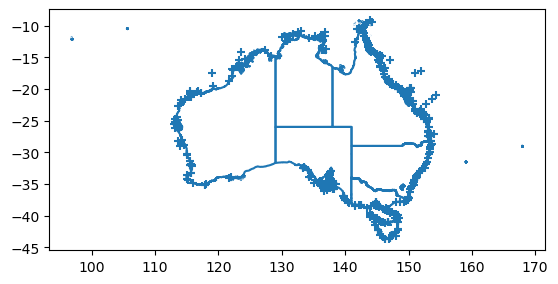

In [33]:
ax = gdf2[gdf['STATUS'] == 'Operational'].plot(marker='+')
oz2.boundary.plot(ax=ax)

-----------------

## Configuring the final map

One annoying feature of the coastline dataset is that we get state borders as well  (as can be seen in the plot above), which are not really part of the story we want to tell.  Rather that trying to juggle the data to merge the state polygons into one Australian polygon, I decided to plot the dataset as first with a wide linewidth, then replot with all lines set to black.  The second plot hides the state borders, but not the coastline. 

<GeoAxes: >

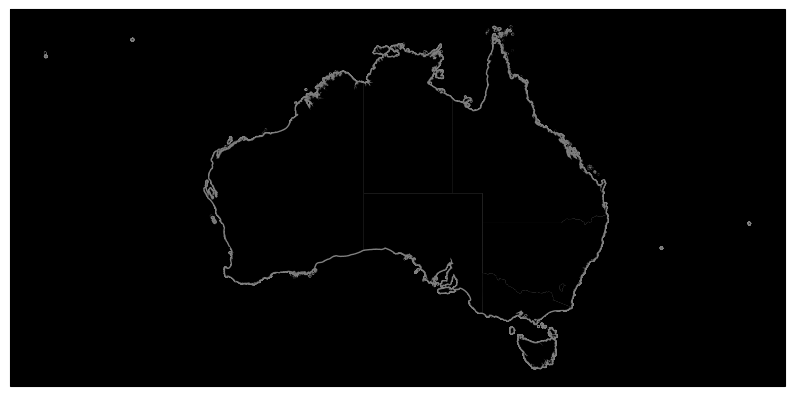

In [34]:
fig, ax = plt.subplots(
    figsize=(10, 10),
    subplot_kw={'projection': ccrs.PlateCarree()},
)

ax.patch.set_facecolor('black')
oz2.plot(
    ax=ax,
    color='black',
    edgecolor='gray',
    linewidth=2,
    zorder=1,
)
oz2.plot(
    ax=ax,
    color='black',
    edgecolor='black',
    linewidth=0,
    alpha=1,
    zorder=2,
)

## Integrated graphic

I took a different tack to the Python Maps book.  In order to create the effect of the lighthouse seeeming dimmer the furtrher you are out to sea, the book create a set of buffers arounds each lighthouse, and plots each buffer (polygon) with a different transparency.  I elected to achieve the same effect by using markers size and transparency.

The book further hides the land-side parts of the lighthouse buffers (polygons), by using spatial operations to subtract the land-side parts from each buffer.  I achieved the same effect by just drawing a black map of the mainland over all the other plots

The image is very illuminating (pun intended);  you can see the export ports for the Western Australian iron ore mines, and the lighthouses supporting navigation along the Great Barrier Reef,and Torres Straight.  The wheat exporting ports of South Australia also show up

<GeoAxes: >

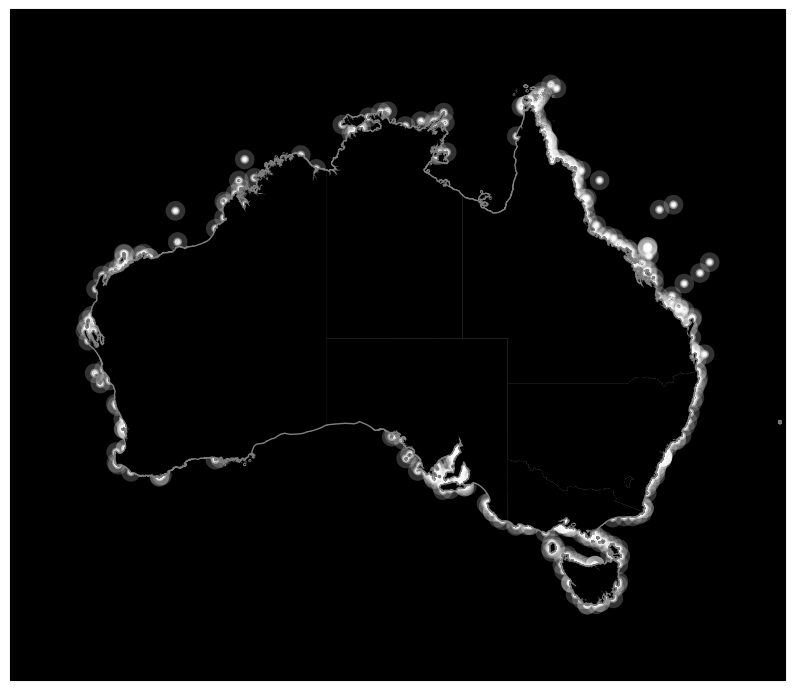

In [35]:
fig, ax = plt.subplots(
    figsize=(10, 10),
    subplot_kw={'projection': ccrs.PlateCarree()},
)

#
ax.patch.set_facecolor('black')

# get the box containing the lighthouses, and add 5 degree each side, to make a margin

bounds = gdf2.total_bounds
# set plot bounds
ax.set_extent(
    [
        bounds[0] - 5,
        bounds[2] + 5,
        bounds[1] - 5,
        bounds[3] + 5,
    ],
    crs=ccrs.PlateCarree(),
)

# set the transparency for each of the markers we will use
alphas = [1, 0.8, 0.6, 0.4, 0.2]
# set the markersize for each of the markers we will use
# bigger markers have increased transparency
markersizes = [2, 10, 20, 40, 200]

# For each of our marker style, draw the operational lighthouses
# using that marker style.  As each white marker gets bigger, we
# increase the transparency, giving a dimming effect
for layer in range(5):

    gdf2[gdf['STATUS'] == 'Operational'].plot(
        color='white',
        ax=ax,
        alpha=alphas[layer],
        markersize=markersizes[layer],
        edgecolor='none',
    )
# end for

# plot the land showing the coastline (and pesky state borders)
oz2.plot(
    ax=ax,
    color='black',
    edgecolor='gray',
    linewidth=2,
    zorder=1,
)

# plot the land as black, hiding the state borders
oz2.plot(
    ax=ax,
    color='black',
    edgecolor='black',
    linewidth=0,
    alpha=1,
    zorder=2,
)

## Different projection

Just for something different, here is an equal area projection, with some line of latitude and longtitude drawn, to give the image a more nautical flavor

### Set equal area projection

In [36]:
albo = ccrs.AlbersEqualArea(
    central_latitude=0,
    false_easting=0,
    false_northing=0,
    central_longitude=132,
    standard_parallels=(-18, -36),
)

Convert all datasets to new projectrion

In [37]:
gdf3 = gdf.to_crs(albo)
oz3 = oz.to_crs(albo)

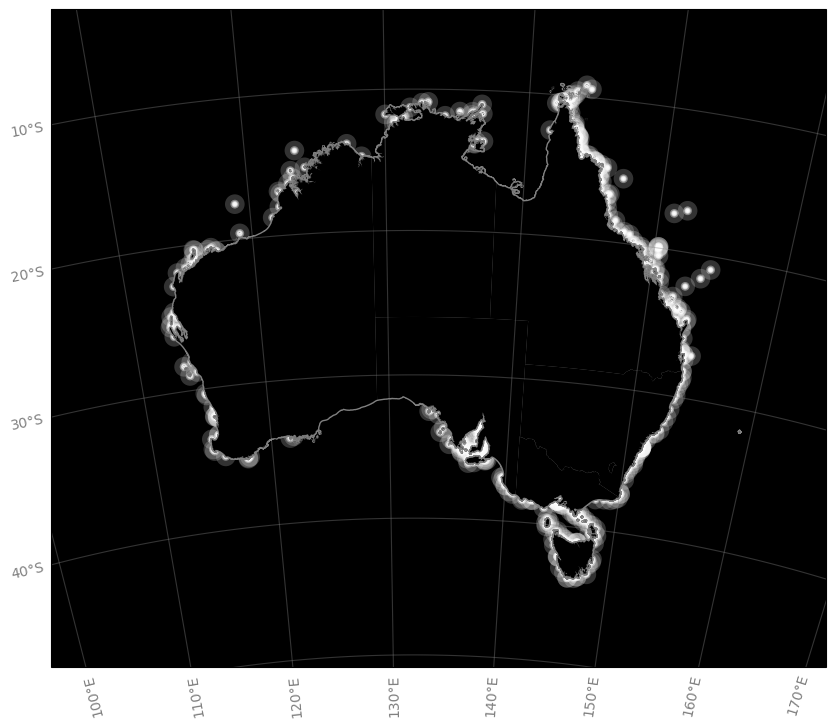

In [38]:
fig, ax = plt.subplots(
    figsize=(10, 10),
    subplot_kw={'projection': albo},
)


ax.patch.set_facecolor('black')
bounds = gdf2.total_bounds
ax.set_extent(
    [
        bounds[0] - 5,
        bounds[2] + 5,
        bounds[1] - 5,
        bounds[3] + 5,
    ],
    crs=ccrs.PlateCarree(),
)

alphas = [1, 0.8, 0.6, 0.4, 0.2]
markersizes = [2, 10, 20, 40, 200]
for layer in range(5):

    gdf3[gdf['STATUS'] == 'Operational'].plot(
        color='white',
        ax=ax,
        alpha=alphas[layer],
        markersize=markersizes[layer],
        edgecolor='none',
    )
# end for

oz3.plot(
    ax=ax,
    color='black',
    edgecolor='gray',
    linewidth=2,
    zorder=1,
)
oz3.plot(
    ax=ax,
    color='black',
    edgecolor='black',
    linewidth=0,
    alpha=1,
    zorder=2,
)

# configure gridlines:  we want labels outside the black image
# alpha=0.4 makes for dim lines
gl = ax.gridlines(
    color='gray',
    alpha=0.4,
    draw_labels=True,
    x_inline=False,
    y_inline=False,
)

# specify line labels only at bottom and left side
gl.top_labels = False
gl.right_labels = False
gl.bottom_labels = True
gl.left_labels = True

gl.xlabel_style = {'color': 'gray'}
gl.ylabel_style = {'color': 'gray'}
gl.rotate_labels = True

## Reproducibility information

In [39]:
%watermark

Last updated: 2025-05-03T19:02:20.899885+10:00

Python implementation: CPython
Python version       : 3.12.9
IPython version      : 9.0.2

Compiler    : MSC v.1929 64 bit (AMD64)
OS          : Windows
Release     : 11
Machine     : AMD64
Processor   : Intel64 Family 6 Model 170 Stepping 4, GenuineIntel
CPU cores   : 22
Architecture: 64bit



In [40]:
%watermark -co  -iv -v -h

Python implementation: CPython
Python version       : 3.12.9
IPython version      : 9.0.2

conda environment: pythonmaps

Hostname: INSPIRON16

geopandas : 1.0.1
cartopy   : 0.24.1
numpy     : 1.26.4
xarray    : 2024.11.0
matplotlib: 3.10.0
pandas    : 2.2.3

